# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
### for ASTM e810 need more resolution, fewer photons per bundle, more waves.
#simulator = simulation.Simulator(results, waves =  80, bundles =  5000000, bundle_size = 1)
simulator = simulation.Simulator(results, waves =  160, bundles =  5000000, bundle_size = 1)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 87232512


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/160 [00:00<?, ?it/s]

# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:30:30  Samples:  33594
 /_//_/// /_\ / //_// / //_'/ //     Duration: 249.511   CPU time: 249.524
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-5f9ff51e-a16f-419e-81b6-35c7d8863f70.json

249.511 run_code  IPython/core/interactiveshell.py:3400
└─ 249.511 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 249.511 run_all_waves  simulation.py:40
      └─ 249.319 run  simulation.py:160
         └─ 247.808 record_results  simulation.py:46
            ├─ 175.086 histogram  stats_cuda.py:51
            │  ├─ 91.252 histogram_4d  stats_cuda.py:300
            │  │  └─ 90.489 histogramdd  cupy/_statistics/histogram.py:285
            │  │     ├─ 72.168 [self]  
            │  │     └─ 17.623 bincount  cupy/_statistics/histogram.py:513
            │  │        └─ 17.608 [self]  
            │  ├─ 67.090 counter  stats_cuda.py:241
   

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))
print(cp.sum(results._box_stage._histogram_4d_count._hist))
print(cp.sum(results._diffuser_stage._histogram_4d_count._hist))


799999849.0
681666014.0
424913319.0


# <center> Source

total photons: 2.00e+16
photon bundle count: 8.00e+08
photon total energy (J): 5.50e-03
photon total power (W): 5.50e+00


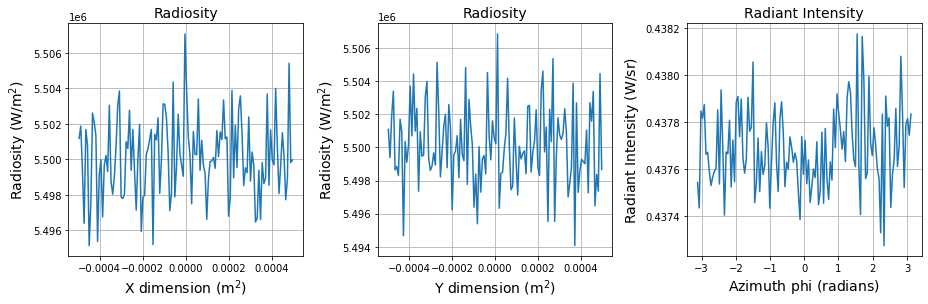

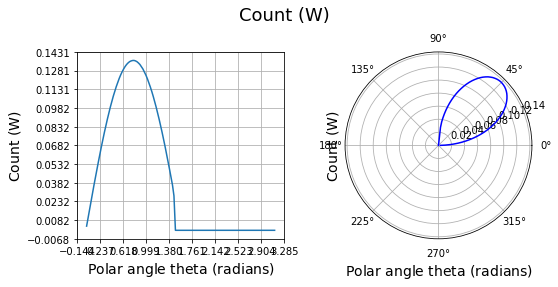

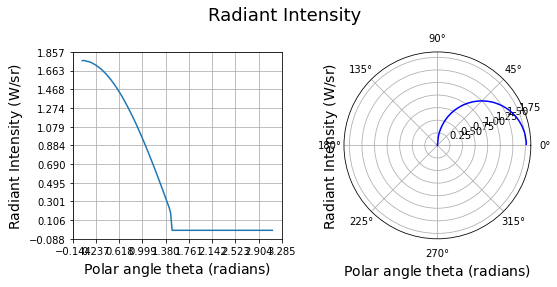

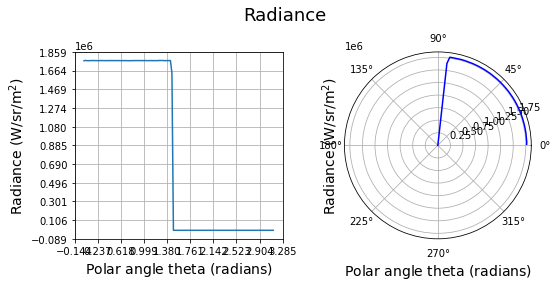

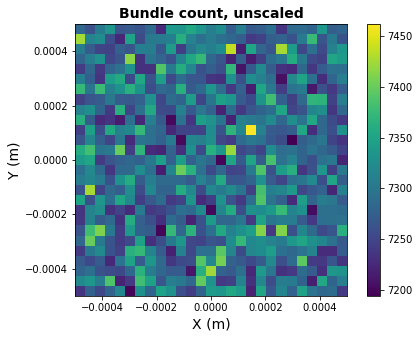

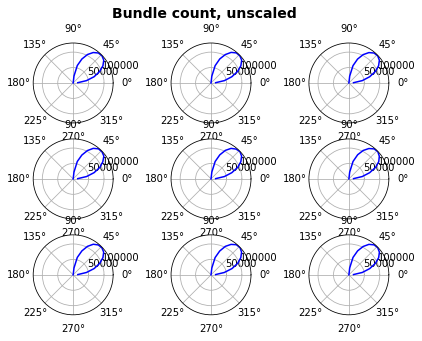

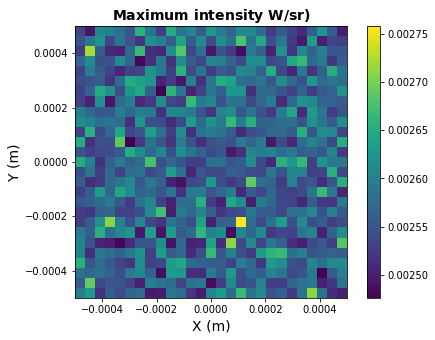

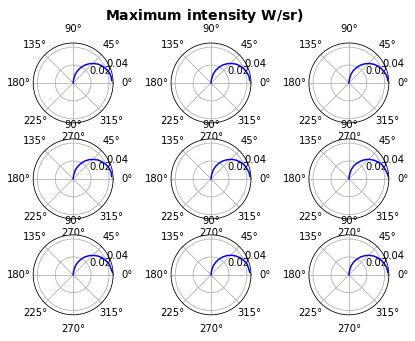

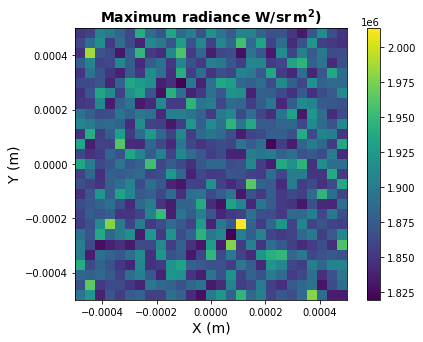

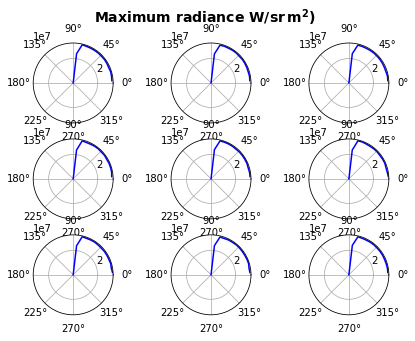

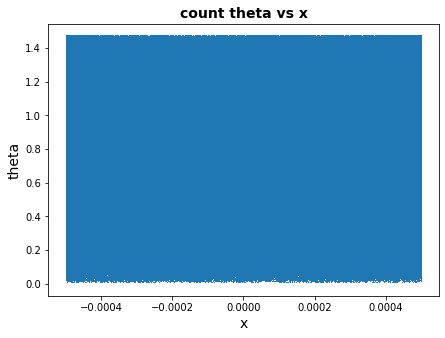

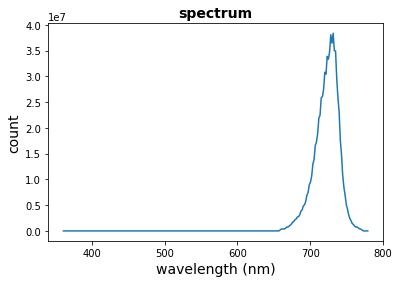

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Lightbox

total photons: 1.70e+16
photon bundle count: 6.82e+08
photon total energy (J): 4.69e-03
photon total power (W): 4.69e+00


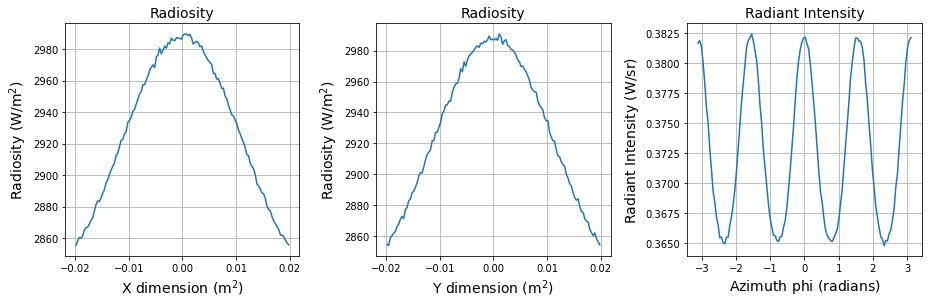

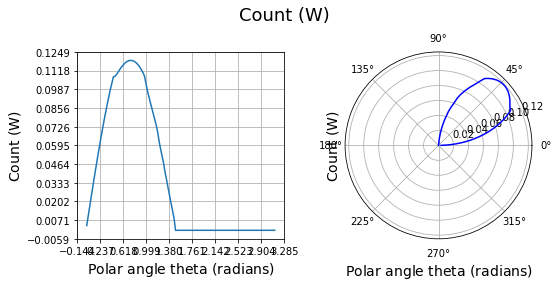

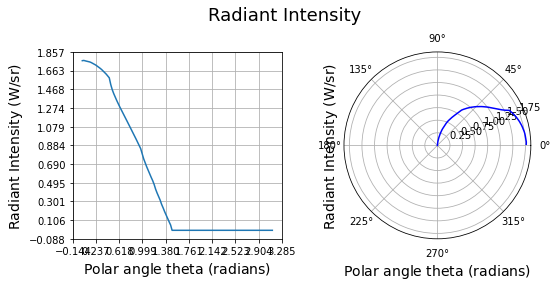

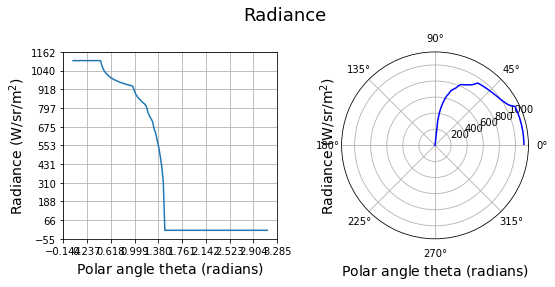

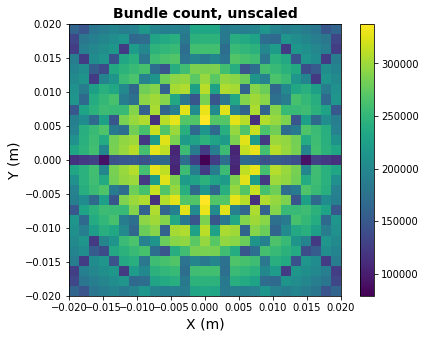

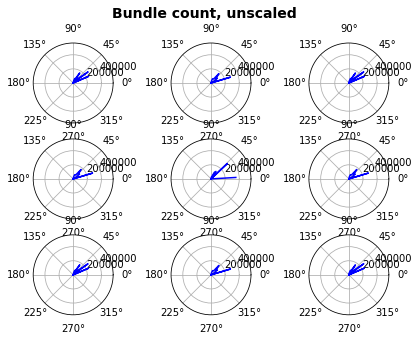

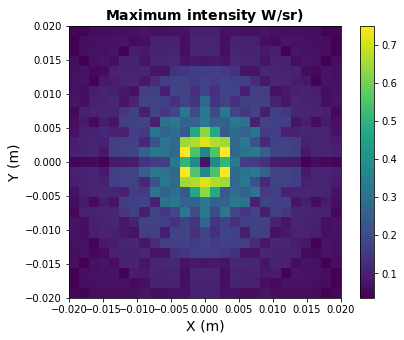

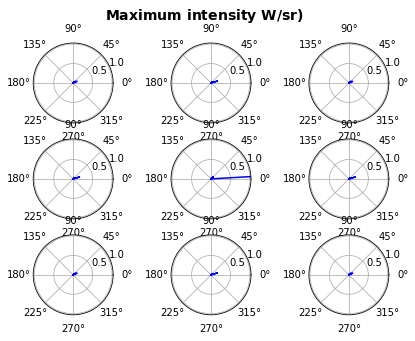

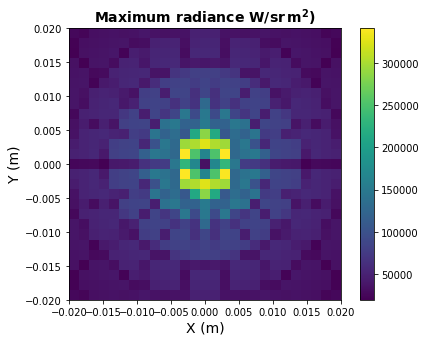

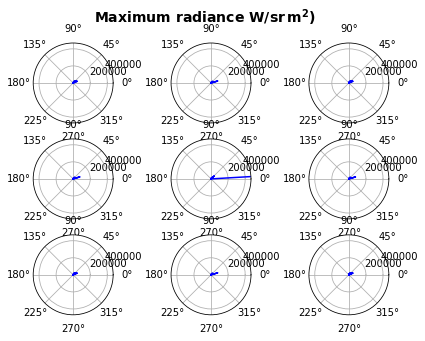

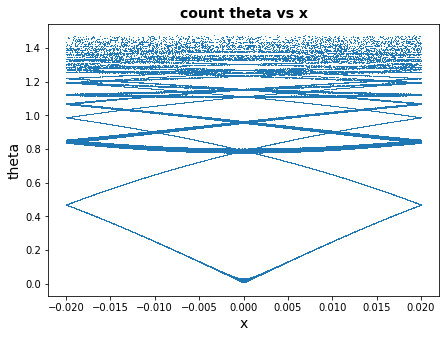

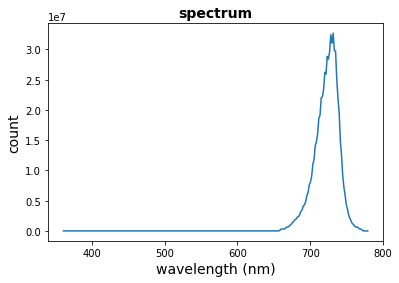

Output()

In [5]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

# <center> Diffuser

total photons: 1.06e+16
photon bundle count: 4.25e+08
photon total energy (J): 2.92e-03
photon total power (W): 2.92e+00


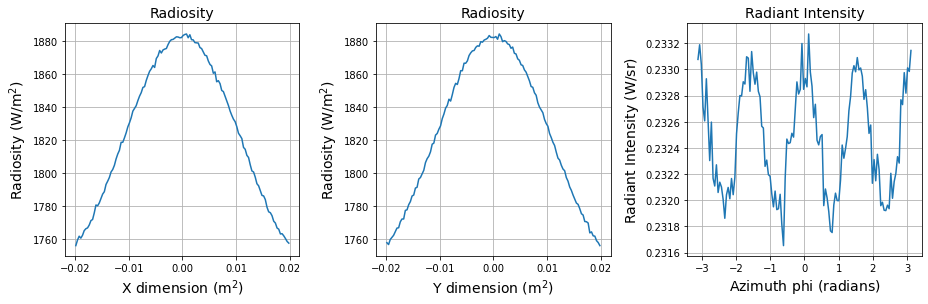

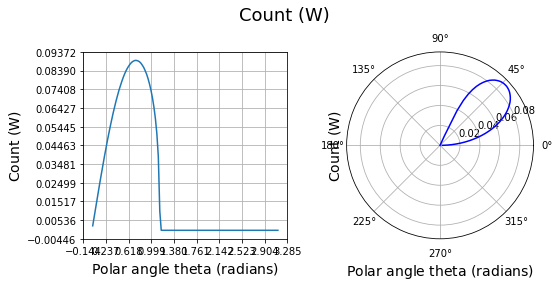

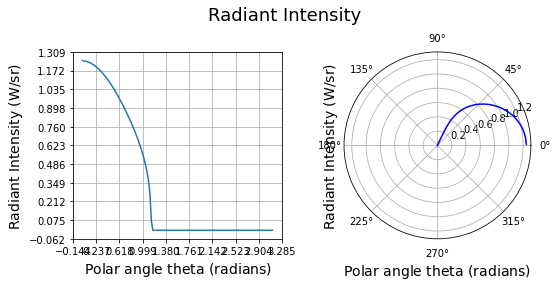

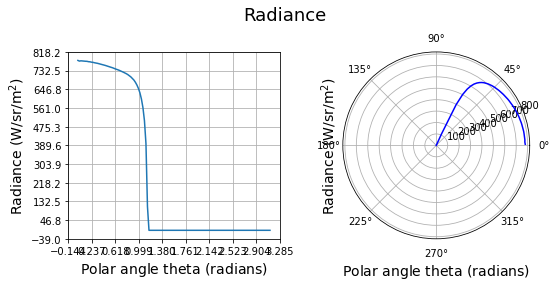

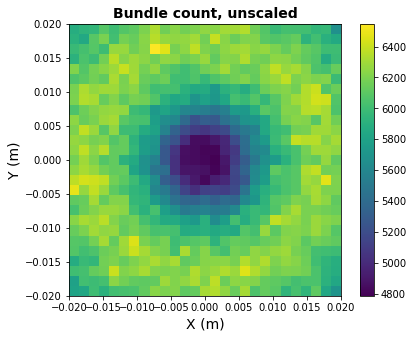

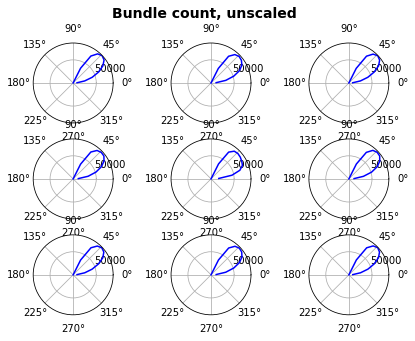

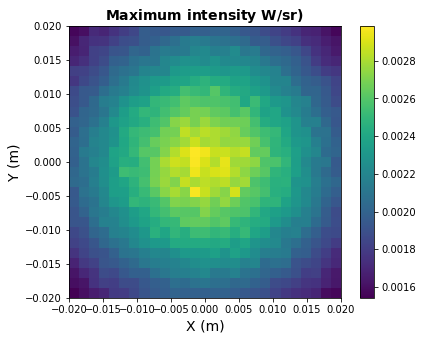

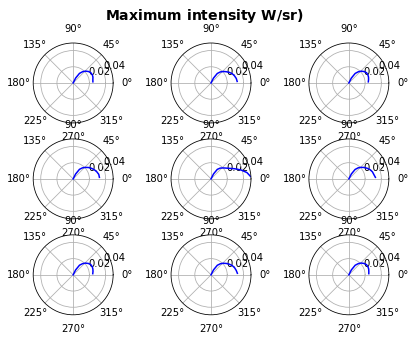

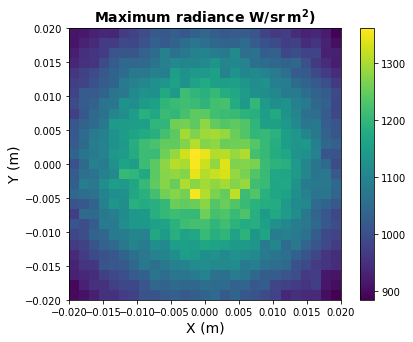

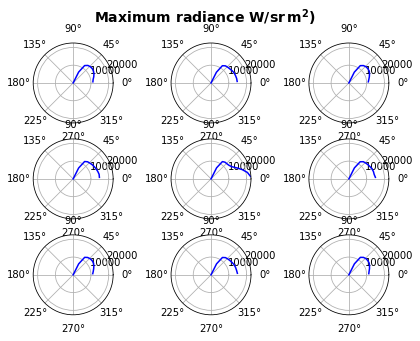

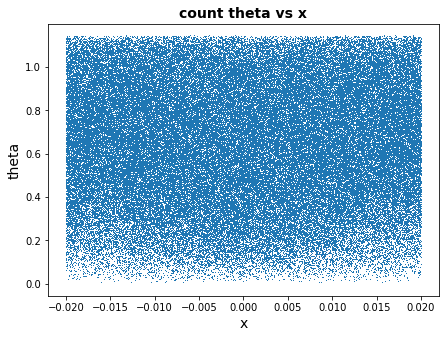

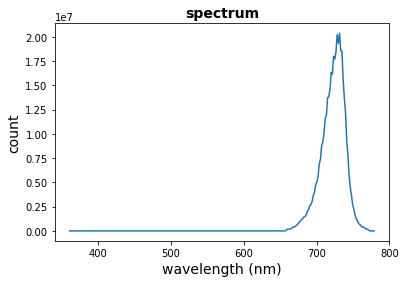

Output()

In [6]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

# <center> Outbound

total photons: 1.91e+14
photon bundle count: 7.62e+06
photon total energy (J): 5.24e-05
photon total power (W): 5.24e-02


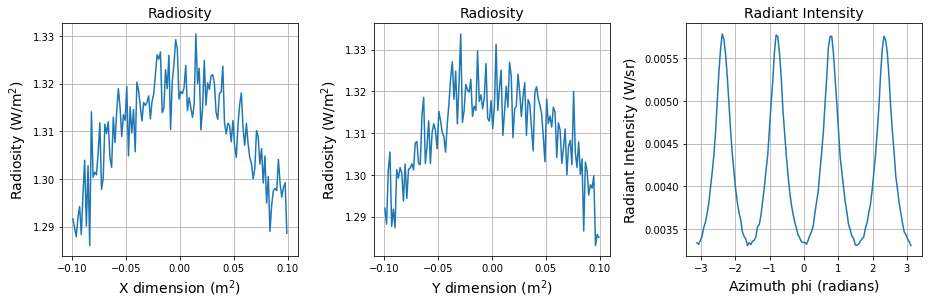

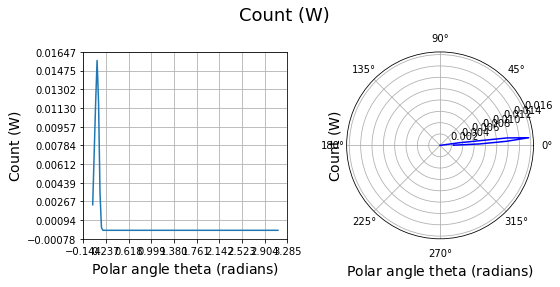

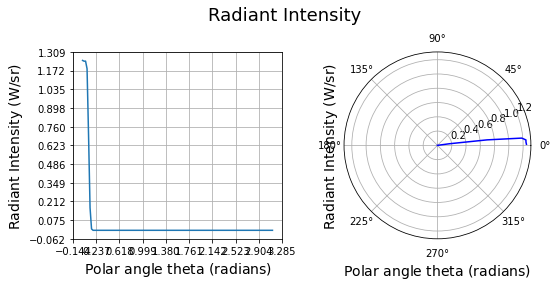

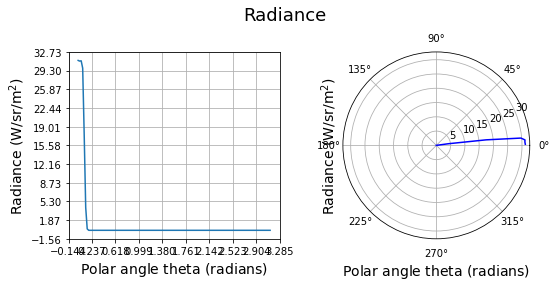

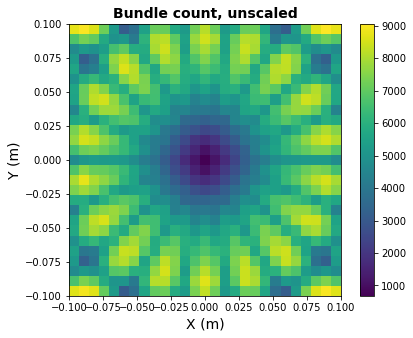

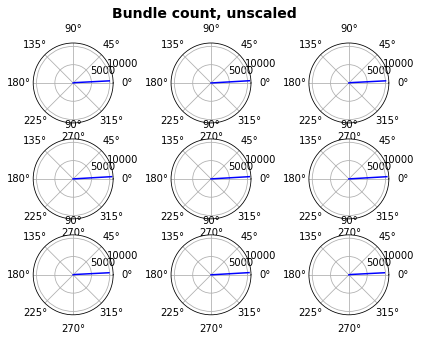

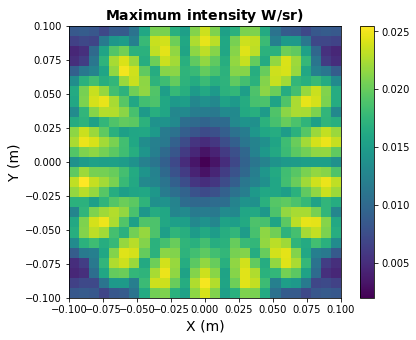

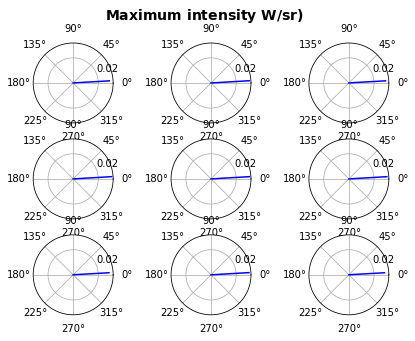

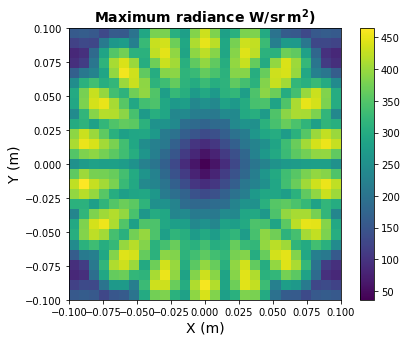

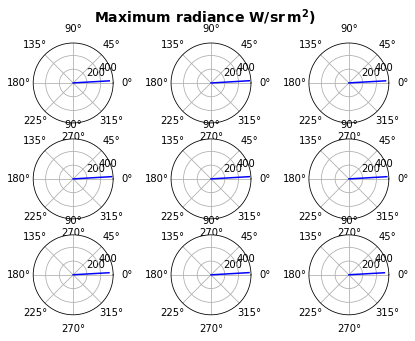

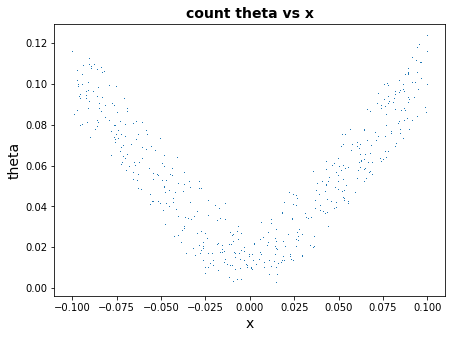

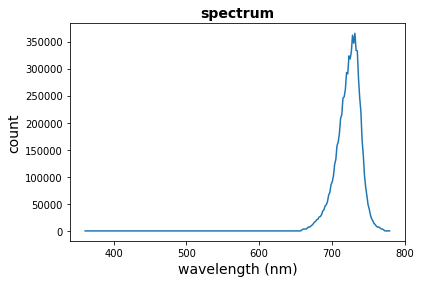

Output()

In [7]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

# <center> Inbound

total photons: 3.05e+13
photon bundle count: 1.22e+06
photon total energy (J): 8.39e-06
photon total power (W): 8.39e-03


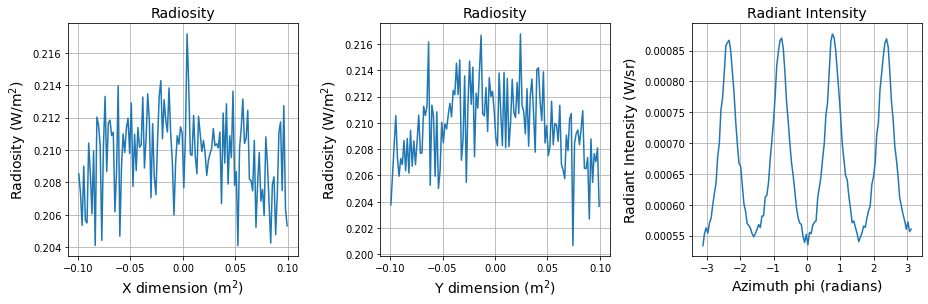

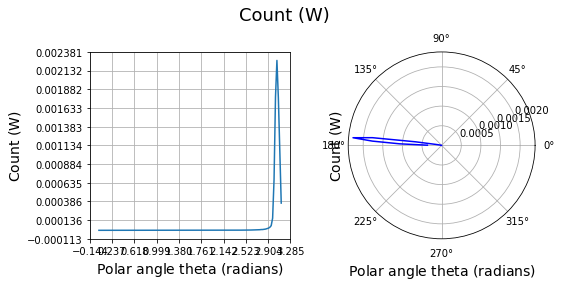

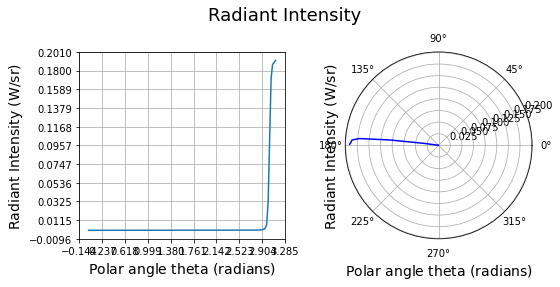

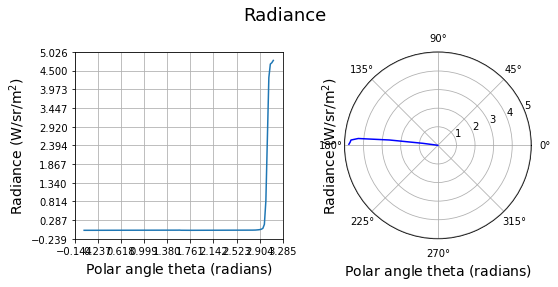

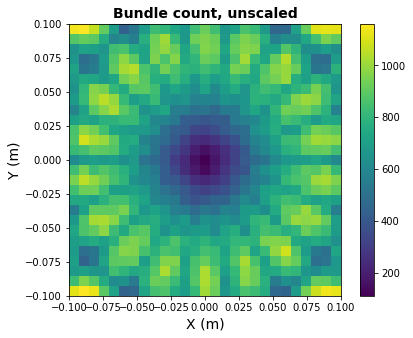

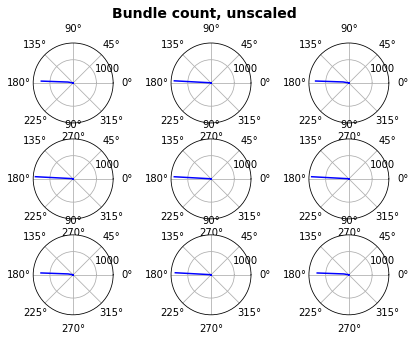

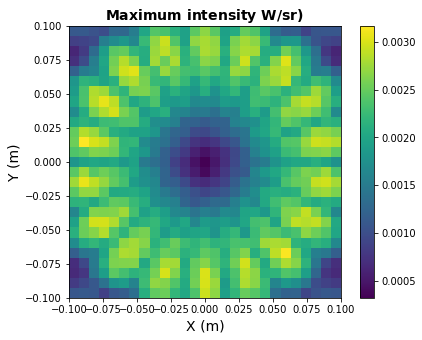

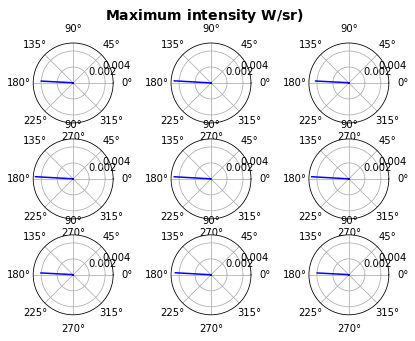

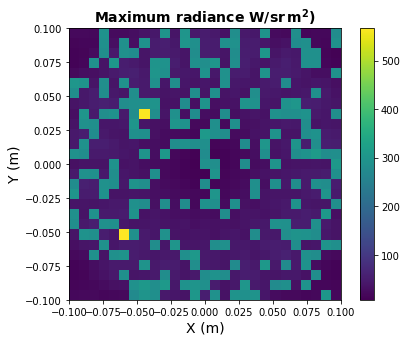

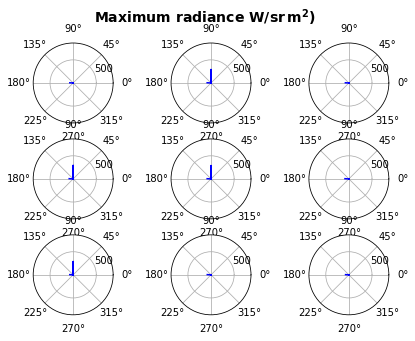

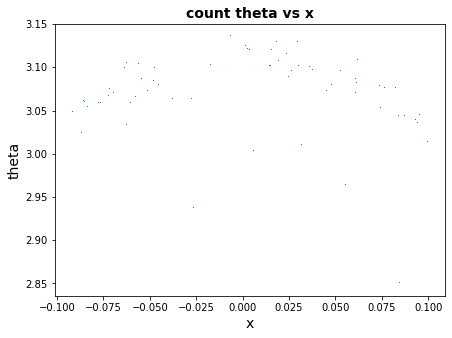

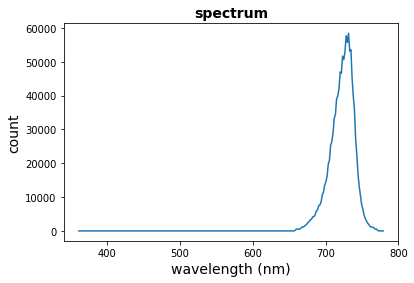

Output()

In [8]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

# <center> Camera Plane

total photons: 3.03e+13
photon bundle count: 1.21e+06
photon total energy (J): 8.34e-06
photon total power (W): 8.34e-03


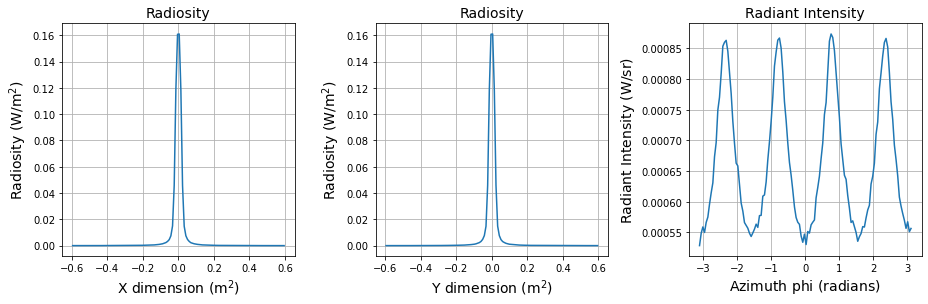

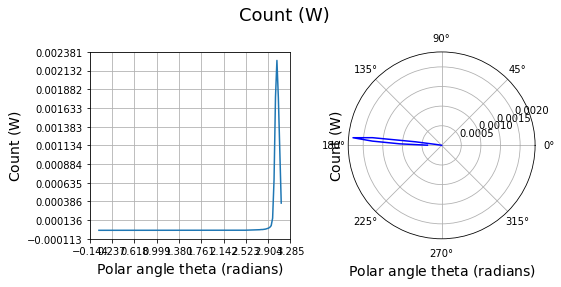

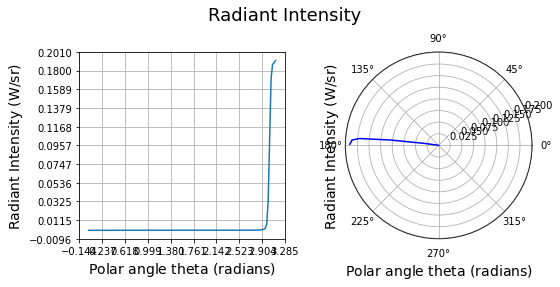

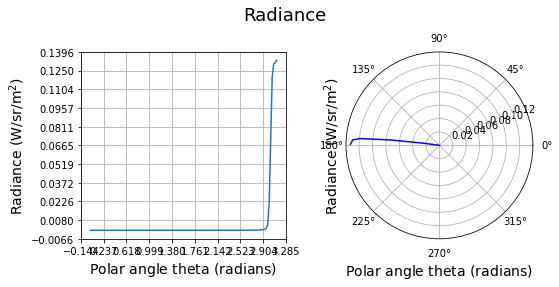

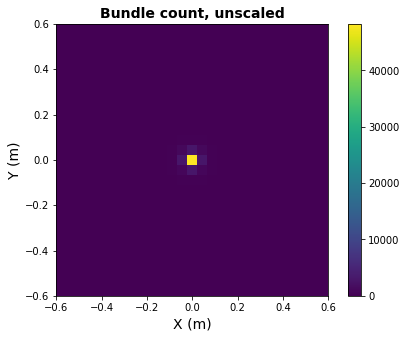

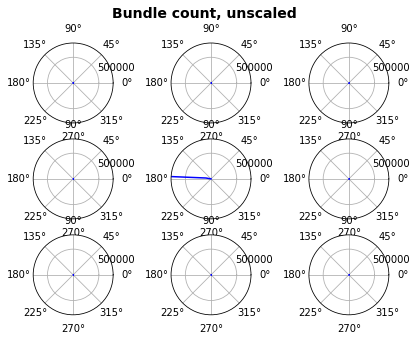

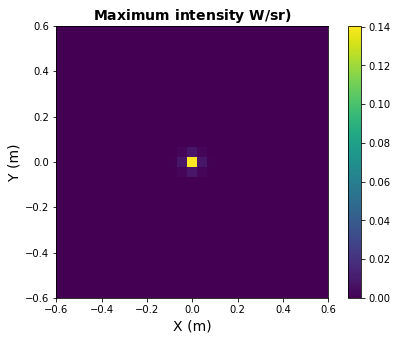

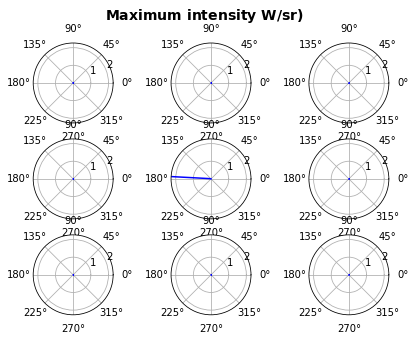

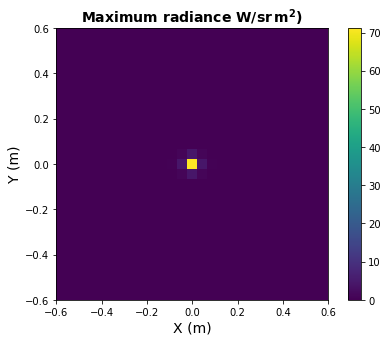

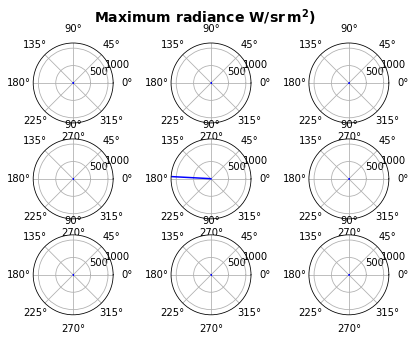

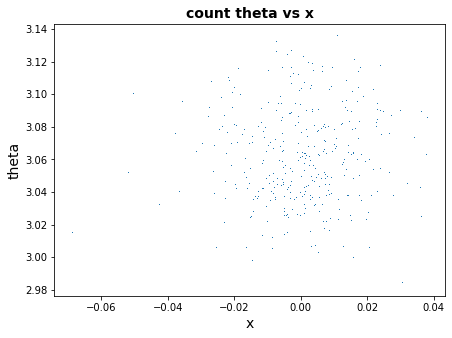

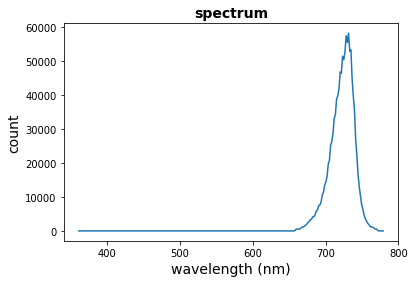

Output()

In [9]:
# before the filter
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

total photons: 2.55e+13
photon bundle count: 1.02e+06
photon total energy (J): 7.01e-06
photon total power (W): 7.01e-03


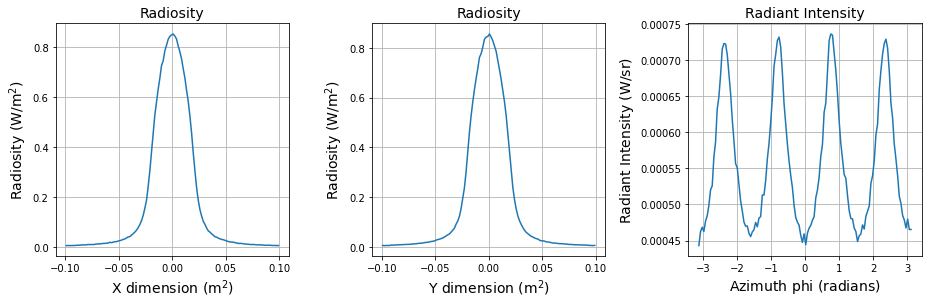

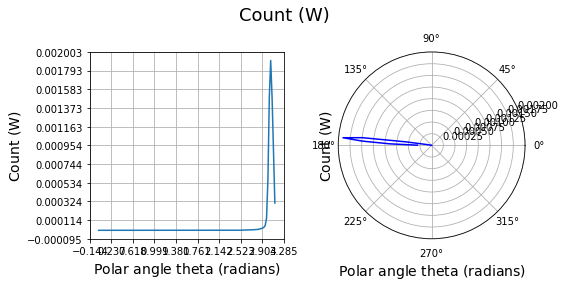

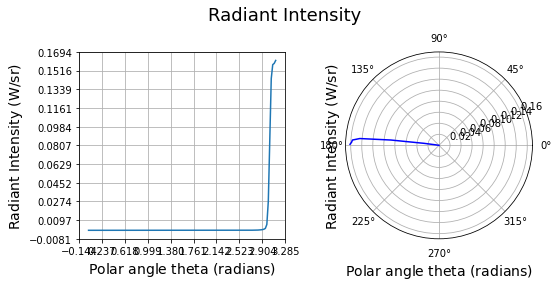

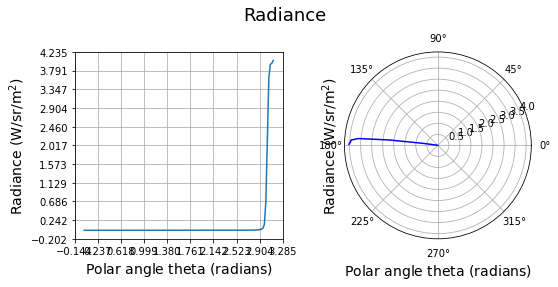

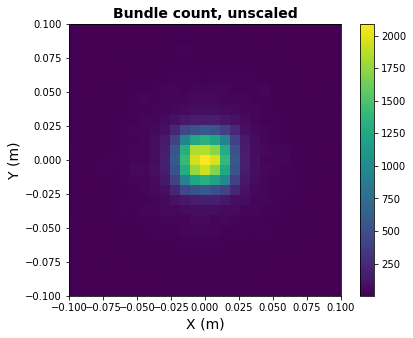

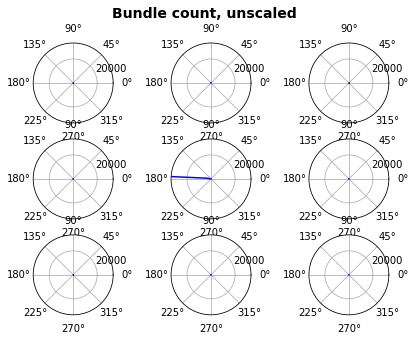

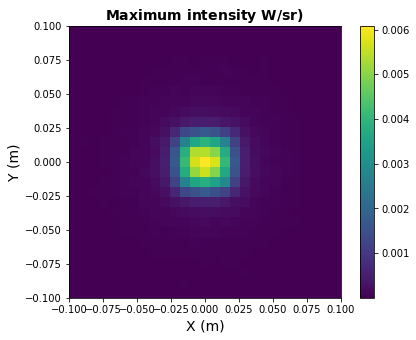

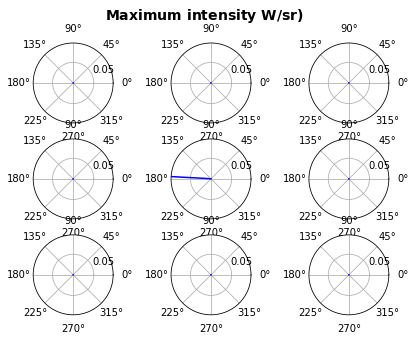

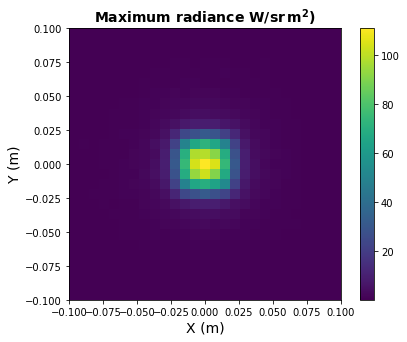

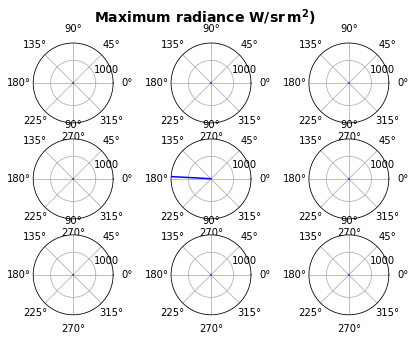

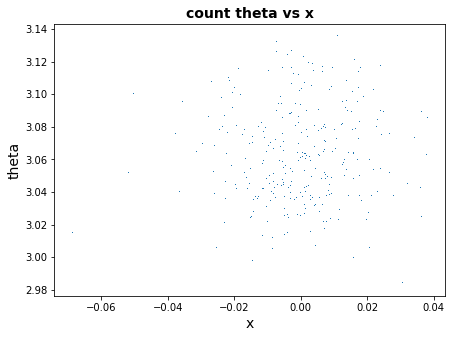

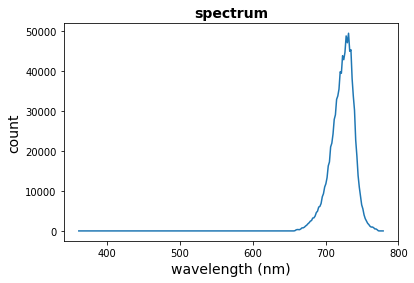

Output()

In [10]:
# after the filter
viz_cuda.summary(results._filter_stage)
viz_cuda.plot_all_histograms(results._filter_stage)
viz_cuda.plot_stages_3d([results._filter_stage])

total photons: 2.99e+11
photon bundle count: 1.20e+04
photon total energy (J): 8.22e-08
photon total power (W): 8.22e-05


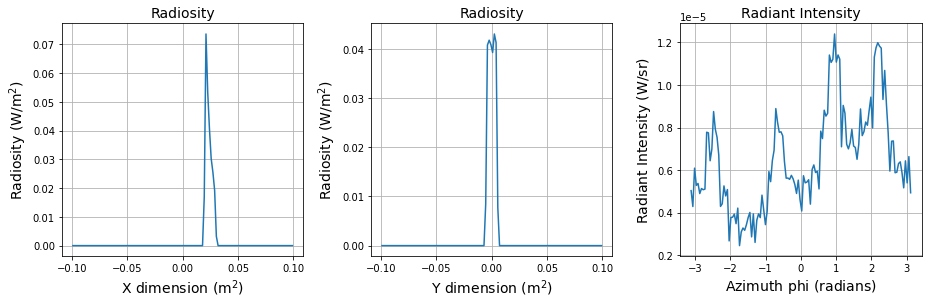

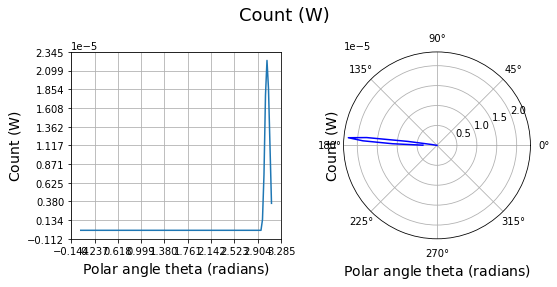

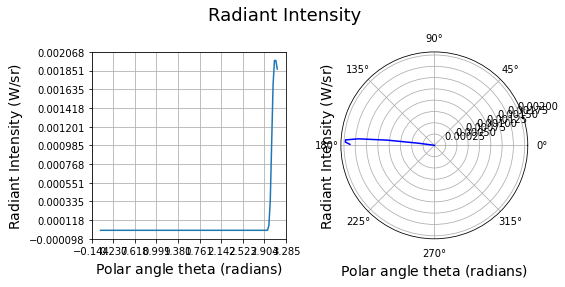

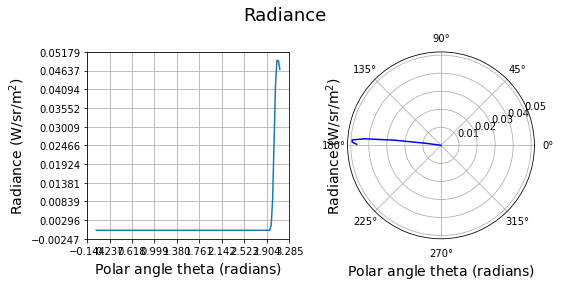

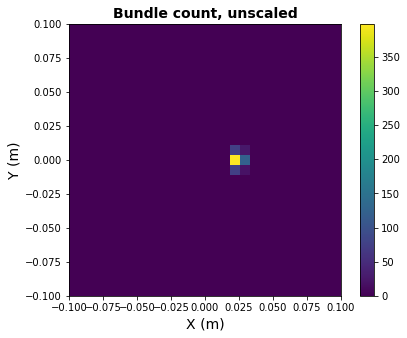

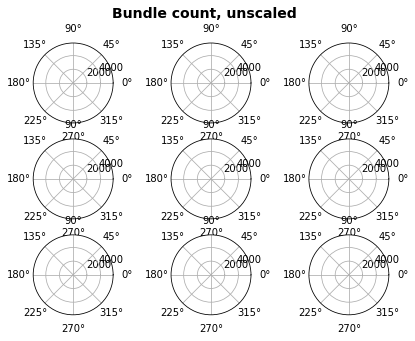

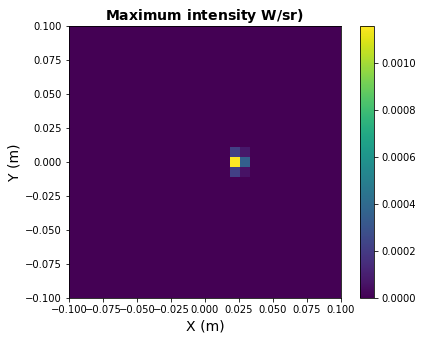

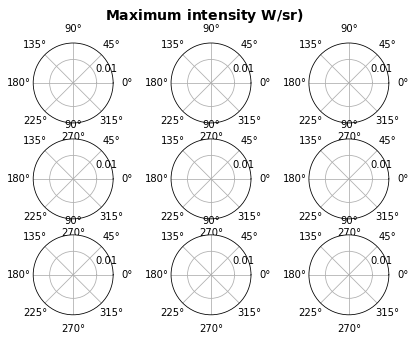

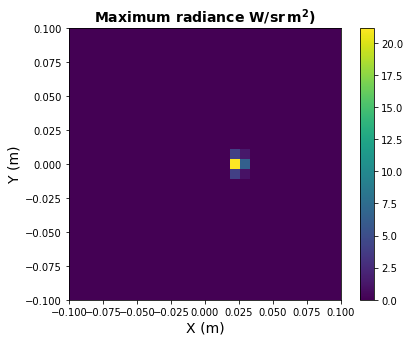

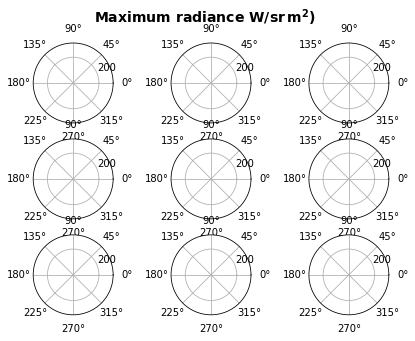

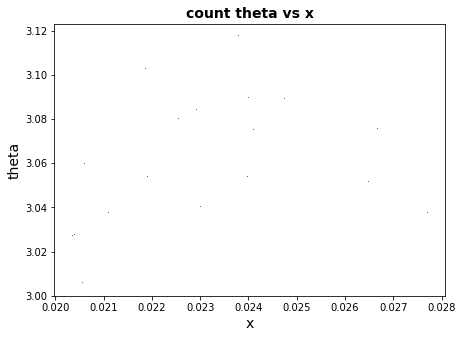

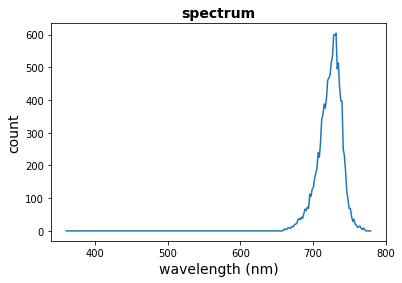

Output()

In [11]:
# same as the camera dimensions
viz_cuda.summary(results._camera_lens_stage)
viz_cuda.plot_all_histograms(results._camera_lens_stage)
viz_cuda.plot_stages_3d([results._camera_lens_stage])

In [12]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])

Output()

In [13]:
print(f"camera total {simulator._camera._total_photons:.2e}")

camera total 2.99e+11
